# Takeaway 3:
## Section 1: Business Understanding
First, I have check all the questions in the survey and the structure of the answers to know more about the business and also, to know what are the potential question I can ask
### Question: 
Apart of the Career satisfaction, what are other factors (implicit or explicit company factors) that influence Job Satisfaction?


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from utils import *

## Section 2: Data Understanding

### Gathering

In [2]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

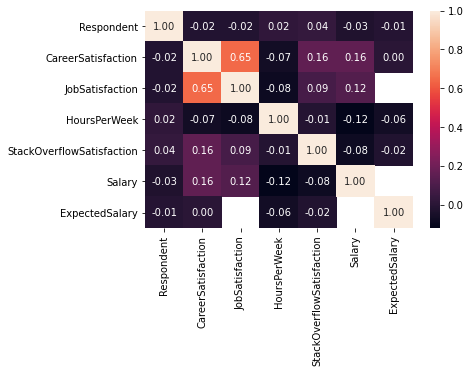

In [3]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

There is a high correlation between JobSatisfaction and CareerSatisfaction. So Im going to not include CareerSatisfaction because i want to know if there are other aspects that influence JobSatisfaction

### Getting only the columns that we are interested in 

In [4]:
takeaway3 = df[
        list(df.columns[df.columns.to_series().str.contains('Influence')]) +
        list(df.columns[df.columns.to_series().str.contains('EquipmentSatisfied')]) +
        [
            'HomeRemote',
            'EmploymentStatus',
            'FormalEducation',
            'JobSeekingStatus',
            'Professional',
            'CompanySize',
            'CompanyType',
            'WebDeveloperType',
            'MobileDeveloperType',
            'NonDeveloperType',
             # 'CareerSatisfaction',
            'YearsCodedJob',
            'ProblemSolving',
            'BuildingThings',
            'LearningNewTech',
            'BoringDetails',
            'JobSecurity',
            'DiversityImportant',
            'FriendsDevelopers',
            'RightWrongWay',
            'UnderstandComputers',
            'SeriousWork',
            'InvestTimeTools',
            'WorkPayCare',
            'KinshipDevelopers',
            'ChallengeMyself',
            'CompetePeers',
            'ChangeWorld',
            'HoursPerWeek',
            'ImportantBenefits',
            'WorkStart',
            'AuditoryEnvironment',
            'ShipIt',
            'OtherPeoplesCode',
            'ProjectManagement',
            'EnjoyDebugging',
            'InTheZone',
            'DifficultCommunication',
            'CollaborateRemote',
            'Salary',
            'Overpaid',
            'JobSatisfaction'
        ]
    ]
takeaway3

,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,...,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,Salary,Overpaid,JobSatisfaction
0,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,...,Agree,Disagree,Strongly disagree,Agree,Somewhat agree,Disagree,Strongly disagree,NaN,NaN,NaN
2,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some influence,Some influence,Some influence,...,Agree,Disagree,Disagree,Agree,Agree,Disagree,Somewhat agree,113750.0,Neither underpaid nor overpaid,9.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Disagree,Somewhat agree,NaN,NaN,3.0
4,Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.0,Greatly underpaid,3.0
51388,Not very satisfied,A lot of influence,Not much influence,No influence at all,Not much influence,Not much influence,Some influence,A lot of influence,Not much influence,No influence at all,...,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
51390,Very satisfied,I am the final decision maker,No influence at all,No influence at all,A lot of influence,A lot of influence,No influence at all,A lot of influence,A lot of influence,No influence at all,...,Disagree,Agree,Disagree,Agree,Agree,Disagree,Agree,40000.0,Greatly underpaid,7.0


## Section 3: Data Preparation

### Wrangling

In [5]:
takeaway3 = takeaway3.dropna(subset=['Overpaid'], axis=0)
takeaway3 = takeaway3[takeaway3['EmploymentStatus'].isin(['Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed'])]
takeaway3 = takeaway3.drop(['EmploymentStatus',], axis=1)

### Making categorical data into quantitative data

In [6]:
options = dict(zip(['Very satisfied', 'Satisfied' ,'Somewhat satisfied', 'Not very satisfied', 'Not at all satisfied'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway3 = takeaway3.replace(k,v)

options = dict(zip(['I am the final decision maker', 'A lot of influence' ,'Some influence', 'Not much influence', 'No influence at all'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway3 = takeaway3.replace(k,v)

options = dict(zip(['Strongly agree', 'Agree' ,'Somewhat agree', 'Disagree', 'Strongly disagree'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway3 = takeaway3.replace(k,v)

In [7]:
takeaway3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13387 entries, 2 to 51390
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InfluenceInternet           9101 non-null   float64
 1   InfluenceWorkstation        8886 non-null   float64
 2   InfluenceHardware           8881 non-null   float64
 3   InfluenceServers            8846 non-null   float64
 4   InfluenceTechStack          8860 non-null   float64
 5   InfluenceDeptTech           8858 non-null   float64
 6   InfluenceVizTools           8863 non-null   float64
 7   InfluenceDatabase           8867 non-null   float64
 8   InfluenceCloud              8862 non-null   float64
 9   InfluenceConsultants        8846 non-null   float64
 10  InfluenceRecruitment        8865 non-null   float64
 11  InfluenceCommunication      8853 non-null   float64
 12  EquipmentSatisfiedMonitors  9101 non-null   float64
 13  EquipmentSatisfiedCPU       910

There are more Categorical columns yet (object)
The next functio will treat the data in the following way:
- For Quantitative data it will use the mean to fill the NAN
- For Categorical data it will use a dummy strategy (create new columns with each option with 0 and 1 and delete the original column)
Probably a better solution would be to split some multichoice columns before doing this.


In [8]:
X, y = imputing_data(takeaway3, y_column='JobSatisfaction')

initial shape: (13387, 57)
Shape without NAN JobSatisfaction: (13350, 57)
Shape without unnecessary columns: (13350, 56)
Quantitative columns: Index(['InfluenceInternet', 'InfluenceWorkstation', 'InfluenceHardware',
       'InfluenceServers', 'InfluenceTechStack', 'InfluenceDeptTech',
       'InfluenceVizTools', 'InfluenceDatabase', 'InfluenceCloud',
       'InfluenceConsultants', 'InfluenceRecruitment',
       'InfluenceCommunication', 'EquipmentSatisfiedMonitors',
       'EquipmentSatisfiedCPU', 'EquipmentSatisfiedRAM',
       'EquipmentSatisfiedStorage', 'EquipmentSatisfiedRW', 'NonDeveloperType',
       'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails',
       'JobSecurity', 'DiversityImportant', 'FriendsDevelopers',
       'RightWrongWay', 'UnderstandComputers', 'SeriousWork',
       'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers',
       'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'HoursPerWeek',
       'ShipIt', 'OtherPeoplesCode', 'ProjectManage

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 2 to 51390
Columns: 2234 entries, InfluenceInternet to Overpaid_Somewhat underpaid
dtypes: float64(43), uint8(2191)
memory usage: 32.4 MB


## Section 4: Modeling

Reducing the number of levels in Job Satisfaction Column

In [10]:
y = (y / 3).apply(np.floor)

 I will use a simple linear regresion model

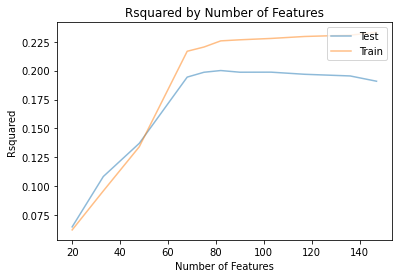

In [11]:
cutoffs = [7000, 5000, 3000, 1000, 800, 600, 400, 200, 100, 50, 40]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [12]:
r2_scores_train

[0.06230981769271349,
 0.09602499480084126,
 0.13419484497194978,
 0.21676775417621208,
 0.22043269108060926,
 0.22575170433730218,
 0.22667696135241555,
 0.22785357552391672,
 0.22954729893836145,
 0.23066937060991932,
 0.23321144881256606]

In [13]:
r2_scores_test

[0.0649340573108792,
 0.10847937464946145,
 0.13717626637053926,
 0.19442731527405632,
 0.19861864202981316,
 0.20010160597261806,
 0.19865095466261695,
 0.19869661897206414,
 0.1968676754963813,
 0.19542429416790985,
 0.1908638888149966]

Seems that in some point (~80 features) the model starts to be overfitted
Also it seems that the prediction is not good enough. Only 19%.

In [14]:
# I have copied this function from Udacity Datascience nanodegree program
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train)

coef_df

,est_int,coefs,abs_coefs
49,JobSeekingStatus_I am not interested in new jo...,0.539022,0.539022
33,HoursPerWeek,-0.453918,0.453918
78,Overpaid_Greatly underpaid,-0.391503,0.391503
26,SeriousWork,0.304481,0.304481
29,KinshipDevelopers,0.265735,0.265735
...,...,...,...
56,CompanySize_Fewer than 10 employees,0.008404,0.008404
6,InfluenceVizTools,-0.007547,0.007547
73,WorkStart_7:00 AM,-0.004286,0.004286
75,WorkStart_9:00 AM,-0.002218,0.002218


However, after checking the coefficients,  it was interesting to see that for instance, more **hours or weeks** have a negative impact on job satisfaction, as well as the feeling of **being underpaid**. And also that makes sense that if you are satisfied with your job you don’t want to change it. Or that if you feel satisfied with the equipment your company has provided you, you are also more motivated to work.

## Solution:
This question was very frustrating for me. I tried many ways to try to have a better conclusion that the one i have. I tried reducing the number of features or reducing the ones that i consider not importat for this context. I also tried with the full set of columns. I tried changing the levels of choises for the output (y), but nothing. It seems there is not a heavy correlation in the Job satisfaction beyond of the career satisfaction, meaning i was not able to improve the model prediction.